# model parameters

In [1]:
import os
import time
import Orange
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score,cross_val_predict,ShuffleSplit,learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.externals import joblib
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import re
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR, LinearSVR
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBRegressor

/home/user/miniconda/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
#ExtraTrees
XTrees_R = ExtraTreesRegressor(
        n_estimators=30,
    #    n_estimators=100,
        criterion='mse',
    #    max_depth=50,
        min_samples_split=5,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features='auto',
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        min_impurity_split=None,
        bootstrap=False,
        oob_score=False,
        n_jobs=1,
        random_state=0,
        verbose=0,
        warm_start=False,
        ccp_alpha=0.0,
        max_samples=None)
    
#XGBoost
XGB_R = XGBRegressor(
    max_depth=5, 
    learning_rate=0.1, 
    n_estimators=150, #(100)
    verbosity=1, 
    objective='reg:squarederror', 
    booster='gbtree', 
    tree_method='auto', 
    n_jobs=12, 
    gamma=0, 
    min_child_weight=1, 
    max_delta_step=0, 
    subsample=1, 
    colsample_bytree=1, 
    colsample_bylevel=1, 
    colsample_bynode=1, 
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=1, 
    base_score=0.5, 
    random_state=0, 
    missing=None, 
    num_parallel_tree=1, 
    importance_type='gain')

# Gradient Boosting
GB_R = GradientBoostingRegressor(
    loss='ls', 
    learning_rate=0.1, 
    n_estimators=100, 
    subsample=1.0, 
    criterion='friedman_mse', 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
 #   max_depth=3, 
    min_impurity_decrease=0.0, 
    min_impurity_split=None, 
    init=None, 
    random_state=None, 
    max_features=None, 
    alpha=0.9, 
    verbose=0, 
    max_leaf_nodes=None, 
    warm_start=False, 
    presort='auto', 
    validation_fraction=0.1, 
    n_iter_no_change=None, 
    tol=0.0001)

NN_R = MLPRegressor(
    hidden_layer_sizes=(100, 100,), 
    activation='relu', 
    solver='adam', 
    alpha=0.0001, 
    batch_size='auto', 
    learning_rate='constant', 
    learning_rate_init=0.001, 
    power_t=0.5, 
    max_iter=500, 
    shuffle=True, 
    random_state=None, 
    tol=0.0001, 
    verbose=False, 
    warm_start=False, 
    momentum=0.9, 
    nesterovs_momentum=True, 
    early_stopping=False, 
    validation_fraction=0.1, 
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=1e-08, 
    n_iter_no_change=10, 
    max_fun=15000)

# Tree
DTree_R = DecisionTreeRegressor(
    criterion='mse', 
    splitter='best', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    min_impurity_split=None, 
    presort=False)

# LR
LR_R = linear_model.LinearRegression(
    fit_intercept=True, 
    normalize=False, 
    copy_X=True, 
    n_jobs=2)

# Lasso
Lasso_R = linear_model.Lasso(
    alpha=1.0, 
    fit_intercept=True, 
    normalize=False, 
    precompute=False, 
    copy_X=True, 
    max_iter=1000, 
    tol=0.0001, 
    warm_start=False, 
    positive=False, 
    random_state=None, 
    selection='cyclic')

# Ridge Regression
Ridge_R = linear_model.Ridge(
    alpha=.5, 
    fit_intercept=True, 
    normalize=False, 
    copy_X=True, 
    max_iter=None, 
    tol=0.001, 
    solver='auto', 
    random_state=None)

# Bayesian Ridge Regression
BRR_R = linear_model.BayesianRidge(
    n_iter=300, 
    tol=0.001, 
    alpha_1=1e-06, 
    alpha_2=1e-06, 
    lambda_1=1e-06, 
    lambda_2=1e-06, 
    compute_score=False, 
    fit_intercept=True, 
    normalize=False, 
    copy_X=True, 
    verbose=False)

# KRR
KRR_R = KernelRidge(
    alpha=1, 
    kernel='linear', 
    gamma='auto', 
    degree=3, 
    coef0=1, 
    kernel_params=None)

# SVR
SVR_R = SVR(
    kernel='rbf', # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
    degree=3, 
    gamma='auto', 
    coef0=0.0, 
    tol=0.001, 
    C=1.0, 
    epsilon=0.1, 
    shrinking=True, 
    cache_size=200, 
    verbose=False, 
    max_iter=-1)

# linear SVR
LSVR_R = LinearSVR(
    epsilon=0.0, 
    tol=0.0001, 
    C=1.0, 
    loss='epsilon_insensitive', 
    fit_intercept=True, 
    intercept_scaling=1.0, 
    dual=True, 
    verbose=0, 
    random_state=None, 
    max_iter=5000)

# SGD
SGD_R = linear_model.SGDRegressor(
    loss='squared_loss', 
    penalty='l2', 
    alpha=0.0001, 
    l1_ratio=0.15, 
    fit_intercept=True, 
    max_iter=1000, 
    tol=0.001, 
    shuffle=True, 
    verbose=0, 
    epsilon=0.1, 
    random_state=None, 
    learning_rate='invscaling', 
    eta0=0.01, 
    power_t=0.25, 
    early_stopping=False, 
    validation_fraction=0.1, 
    n_iter_no_change=5, 
    warm_start=False, 
    average=False)

#KNR
KNR_R = KNeighborsRegressor(
    n_neighbors=5, 
    weights='uniform', 
    algorithm='auto', 
    leaf_size=30, 
    p=2, 
    metric='minkowski', 
    metric_params=None, 
    n_jobs=2)

# GPR
kernel = DotProduct() + WhiteKernel()
GPR_R = GaussianProcessRegressor(
    kernel=None, 
    alpha=1e-10, 
    optimizer='fmin_l_bfgs_b', 
    n_restarts_optimizer=0, 
    normalize_y=False, 
    copy_X_train=True, 
    random_state=None)

def get_regressor_lib(keys=None):
    '''keys: None, keys or list'''
    assert keys == None or type(keys) in [str,list
              ], 'keys should be None, a string or a list!'
    
    reg_lib = { 'XGB_R' : XGB_R,  'RF_R': RF_R,   'Ada_R': Ada_R, 'GB_R' : GB_R, 'DTree_R': DTree_R, 'LR_R' : LR_R, 
            'Lasso_R' : Lasso_R, 'Ridge_R': Ridge_R, 'BRR_R': BRR_R, 'KRR_R'  : KRR_R,   'SVR_R': SVR_R, 
            'LSVR_R'  : LSVR_R,  'SGD_R'  : SGD_R,   'KNR_R': KNR_R, 'GPR_R'  : GPR_R,    'NN_R': NN_R }
    
    
    if keys == None:
        return reg_lib
    elif type(keys) == str:
        assert keys in reg_lib.keys()
        return reg_lib[keys]
    elif type(keys) == list:
        for key in keys:
            assert key in reg_lib.keys()
        return [reg_lib[key] for key in keys]



In [3]:
# model parameters
raf = RandomForestRegressor(
    n_estimators=30,
#    n_estimators=100,
    criterion='mse',
    #max_depth=50,
    min_samples_split=5,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    #bootstrap=True,
    oob_score=False,
    n_jobs=1,
    random_state=0,
    verbose=0,
    ccp_alpha=0.0,
    max_samples=None
)

ada = AdaBoostRegressor(base_estimator=XTrees_R,
                        n_estimators=50,
                        learning_rate=1.0, 
                        loss='exponential',  # ‘linear’, ‘square’, ‘exponential’
                        random_state=None)


# training

In [4]:
class HAT_Reac_Predictor:
    def __init__(self, Origin_dir, Origin_TrainSet_f, model, reloadTimestamp=None):
        # import TrainSet and TestSet data and random
        self.Origin_dir = Origin_dir
        self.Origin_Train_data = Orange.data.Table.from_file(Origin_TrainSet_f)
        self.Origin_Train_data.shuffle()
        print('Origin_Train_data.X.shape: ', self.Origin_Train_data.X.shape)
        print('Origin_Train_data.domain: ',self.Origin_Train_data.domain)
        # Data standardization
        self.scaler = StandardScaler()
        self.scaler.fit(self.Origin_Train_data.X)
        self.model = model
#        self.classes_num = self.Origin_Train_data.domain.class_var.values
        self.LoadDataTime = time.strftime(
            '%Y%m%d_%H%M%S', time.localtime(time.time()))
        self.CrossValidation()
        self.reloadTimestamp = reloadTimestamp
        self.RFECV_Train()
   #     self.GetScore()
   #     self.Get_learning_curve()
    
#    def Load_test_data
    def CrossValidation(self):
        self.cv = skl.model_selection.KFold(
            n_splits=5, random_state=200, shuffle=True)
        self.X, self.y = self.scaler.transform(
            self.Origin_Train_data.X), self.Origin_Train_data.Y
        self.cv_mse_scores = cross_val_score(self.model, self.X, self.y, cv=self.cv, scoring='neg_mean_squared_error')
        print('model:', self.model)
        print('cv_mse_scores.mean():', -self.cv_mse_scores.mean())
        self.yCVPred=cross_val_predict(self.model, self.X, self.y, cv=self.cv)
        self.test_index = [i[1] for i in self.cv.split(self.X)]
        #print(self.test_index)
        self.y_true_all = [self.y[k] for k in self.test_index]
        self.y_predict_all = [self.yCVPred[j] for j in self.test_index]
        self.MSEscore = np.mean([mean_squared_error(i, j) for i, j in zip(self.y_true_all, self.y_predict_all)])
        self.MAEscore = np.mean([mean_absolute_error(i, j) for i, j in zip(self.y_true_all, self.y_predict_all)])
        self.R2score  = np.mean([r2_score(i, j) for i, j in zip(self.y_true_all, self.y_predict_all)])
        print('CV-MAE: ',self.MAEscore)
        print('CV-MSE: ',self.MSEscore)
        print('CV-R2: ',self.R2score)
        return self.X, self.y, self.yCVPred
    
    def Load_test_data(self, Origin_ExtraSet_f, DataType='ExtraSet'):
        # import ExtraSet data and random
        self.Origin_Extra_data = Orange.data.Table.from_file(Origin_ExtraSet_f)
        #self.Origin_Extra_data.shuffle()
        self.DataType = DataType
        self.Ex, self.Ey = self.scaler.transform(
            self.Origin_Extra_data.X), self.Origin_Extra_data.Y        
        return self.Ex, self.Ey
    
    def RFECV_Train(self):
        model_folder = 'models_pkg'
        if os.path.isdir(r"%s/%s" % (self.Origin_dir, model_folder)) == False:
            os.makedirs(r"%s/%s" % (self.Origin_dir, model_folder))
            
        if self.reloadTimestamp == None:
            min_f = 1
            selector = RFECV(self.model, step=1, min_features_to_select=min_f, cv=self.cv,
                            scoring='neg_mean_squared_error', n_jobs=12)
            self.selector = selector.fit(self.X, self.y)
            #self.model = self.selector
            self.model = selector
            #print('F1_score: ', skl.metrics.f1_score(
            #    self.y, self.selector.predict(self.X), average='micro'))
            print('MSE: ',mean_squared_error(self.y, self.selector.predict(self.X)))
            self.n_features = selector.grid_scores_.argmax()
            print(self.n_features)
            self.RFECV_score = selector.grid_scores_[self.n_features]
         #   selector.cv.split(X, y)
            joblib.dump(self.selector, r'%s/%s/FinalModel_%s.pkl'
                    % (self.Origin_dir, model_folder, self.LoadDataTime))
        else:
            self.selector = joblib.load(r'%s/%s/FinalModel_%s.pkl'
                                % (self.Origin_dir, model_folder, self.reloadTimestamp))
            self.RFECV_score = self.selector.grid_scores_[self.selector.grid_scores_.argmax()]
            #print('MSE: ',mean_squared_error(self.y, self.selector.predict(self.X)))
        print('RFECV_score: ', self.RFECV_score)
        return self.selector

    def GetScore(self):
        if self.reloadTimestamp == None:
            #self.yPred=self.model.cross_val_predict(self.X, self.y, cv=self.cv)
            self.yPred=cross_val_predict(self.model, self.X, self.y, cv=self.cv)
        else:
            self.yPred=cross_val_predict(self.selector, self.X, self.y, cv=self.cv)
        self.test_index = [i[1] for i in self.cv.split(self.X)]
        #print(self.test_index)
        self.y_true_all = [self.y[k] for k in self.test_index]
        self.y_predict_all = [self.yPred[j] for j in self.test_index]
        self.MSEscore = np.mean([mean_squared_error(i, j) for i, j in zip(self.y_true_all, self.y_predict_all)])
        self.MAEscore = np.mean([mean_absolute_error(i, j) for i, j in zip(self.y_true_all, self.y_predict_all)])
        self.R2score  = np.mean([r2_score(i, j) for i, j in zip(self.y_true_all, self.y_predict_all)])
        print('model:', self.model)
        print('GS-MAE: ',self.MAEscore)
        print('GS-MSE: ',self.MSEscore)
        print('GS-R2: ',self.R2score)
        return self.yPred
        
    def Get_learning_curve(self):
        figures_folder='Figures'
        #title = "Learning Curves (%s)" % self.suffix if not notitle else None
        # Cross validation with 100 iterations to get smoother mean test and train
        # score curves, each time with 20% data randomly selected as a validation set.
        cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(self.model, self.X, self.y, cv=cv, n_jobs=12,
                           train_sizes=np.linspace(.05, 1.0, 20),
                           return_times=True)
        self.LearnCurve_kwargs = {'train_sizes': train_sizes, 'train_scores': train_scores,
                                  'test_scores': test_scores, 'fit_times': fit_times,
                                  'title': "Learning Curves", 'ylim': (0.7, 1.01)}
        plot_learning_curve(**self.LearnCurve_kwargs, figure_file=r'%s/%s/LearningCurve_%s.png' % (
                            self.Origin_dir, figures_folder, self.LoadDataTime))
        return self
        
    
    def Plot_figure(self, y_DFT, y_pred, size, xyaxis, figures_folder='Figures', band_width=0):
        self.y_DFT  = y_DFT
        self.y_pred = y_pred
        plt.rcParams['mathtext.fontset'] = 'custom'
        plt.rcParams['mathtext.it'] = 'Arial:italic'
        plt.rcParams['mathtext.bf'] = 'Arial:italic:bold'
        sns.set(style='darkgrid')
        #sns.set(style="ticks")
        plt.figure(figsize=size)
        x = np.arange(0,40)
        y = x
        l = plt.plot(x,y)
        plt.fill_between(x,x+band_width,x-band_width,alpha=0.2,color='yellow')
        plt.axis(xyaxis)
        plt.scatter(self.y_DFT, self.y_pred, c="b", label="samples")
        plt.xlabel("DFT-Computed Barrier (kcal/mol)", fontsize=20)
        plt.ylabel("ML-Predicted Barrier (kcal/mol)", fontsize=20)
        plt.tick_params(axis='x',labelsize=16)
        plt.tick_params(axis='y',labelsize=16)
        #ax.tick_params(axis='y',labelsize=8)
        self.distribution_plot = sns.jointplot(y_DFT, y_pred, kind='kde', xlim=(0,40), ylim=(0,40),height=8)    
        #plt.legend()
        plt.show()
        self.R2 = r2_score(self.y_DFT, self.y_pred)
        self.MAE = mean_absolute_error(self.y_DFT, self.y_pred)
        self.MSE = mean_squared_error(self.y_DFT, self.y_pred)
        self.RMSE= self.MSE**0.5
        print('R2: ', self.R2)
        print('MAE: ', self.MAE)
        print('MSE: ', self.MSE)
        print('RMSE: ', self.RMSE)
    #    print(self.model)
#        return self
        
#    def Plot_Feature_Engeneering(self):
        Plot_RFECV(self.selector, figure_file=r'%s/%s/RFECV_FeatureSelection_%s.png' % (
                    self.Origin_dir, figures_folder, self.LoadDataTime))
    
        Barh_Feature_Ranking(self.Origin_Train_data, self.selector, best_k=15,
                             figure_file=r'%s/%s/RFECV_FeatureRanking_For5_%s_best15.png' % (
                                 self.Origin_dir, figures_folder, self.LoadDataTime))
        #all feature ranking
        Barh_Feature_Ranking(self.Origin_Train_data, self.selector, best_k=None,
                             figure_file=r'%s/%s/RFECV_FeatureRanking_For5_%s_all.png' % (
                                 self.Origin_dir, figures_folder, self.LoadDataTime))
        
        return #self.distribution_plot
    


In [5]:
def Barh_Feature_Ranking(Origin_Train_data, selector, best_k=15, figure_file=None):
    sns.set(style="ticks")
    #sns.set(style='darkgrid')
    colors_lib = np.array(['red', 'orange', 'blue', 'purple', 'darkgreen','salmon', 'tan', 'cyan', 'violet', 'lightgreen'])

    def get_EQBVG(astr):
        EQBVG2Num_dict = {'E': 0, 'Q': 1, 'B': 2, 'V': 3, 'BDE': 4}
        EQBVG = re.findall(r'BDE|E|Q|B|V', astr)
        #EQBVG2Num_dict = {'_E_': 0, '_Q_': 1, '_B_': 2, '_V_': 3, 'BDE': 4}
        #EQBVG = re.findall(r'_E_|_Q_|_B_|_V_|BDE', astr)
        #print(EQBVG)
        is_of_R = 1 if re.match(r'c',astr) else 0
        #is_of_R = 1 if re.match(r'_R_',astr) else 0
        Num = EQBVG2Num_dict[EQBVG[0]] + is_of_R*len(EQBVG2Num_dict)
        return Num

    features = Origin_Train_data.domain.attributes
    features_name = [features[i].name for i in range(len(features))]
    features_name_selected = [f for f, s in zip(
        features_name, selector.support_) if s]
    features_ranking = np.array(
        [features_name_selected, selector.estimator_.feature_importances_]).T
    features_ranking = pd.DataFrame(features_ranking, columns=[
        'Feature name', 'scores']).sort_values(by=['scores'], ascending=False)
    if best_k == None:
        best_k = features_ranking.shape[0]
    
    features_ranking['scores'] = features_ranking['scores'].astype(float)
    print(features_ranking.iloc[:best_k])
    color_idx = [get_EQBVG(x) for x in features_ranking.iloc[:best_k, 0]]    
    colors = colors_lib.take(color_idx)
    
    plt.rcdefaults()
    #fig, ax = plt.subplots(figsize=(10, 8))
    fig, ax = plt.subplots(figsize=(10, best_k//2+1))

    # ax.barh(np.arange(len(features_name_selected)), features_ranking['scores'], align='center',
    #        color='orange')
    ax.barh(np.arange(best_k), features_ranking.iloc[:best_k, 1], align='center',
            color=colors, alpha=0.8)
    labels = ['FMO Energy (E)', 'Atomic Charge (Q)','Bond Order (B)', 'Steric Effect (V)', 'BDE']  #Buried Volume
    color_unique, idx_c = np.unique(color_idx, return_index=True)
    for ci in color_unique[np.argsort(idx_c)]:
        if ci < len(colors_lib)/2:
            ax.barh(np.argwhere(np.array(color_idx) == ci).flatten(),
                    0, color=colors_lib[ci], alpha=0.8, label=labels[ci])
    for ci in color_unique[np.argsort(idx_c)]:
        if ci >= len(colors_lib)/2:
            ax.barh(np.argwhere(np.array(color_idx) == ci).flatten(),
                    0, color=colors_lib[ci], alpha=0.8, label=labels[ci])

    plt.tick_params(axis='both', which='major', labelsize=16)
    ax.set_yticks(np.arange(best_k))
    ax.set_yticklabels(features_ranking.iloc[:best_k, 0], fontsize=20)
    ax.invert_yaxis()  # labels read top-to-bottom
    #x_max, x_min = float(features_ranking['scores'].max()), float(features_ranking['scores'].min())
    #ax.set_xticks(np.linspace(x_min, x_min, 5))
    #ax.set_xticklabels(tuple(np.linspace(x_min, x_max, 5)))
    ax.set_xlabel('Feature Importance Score', fontsize=20)
    #ax.set_title('Feature importance Ranking', fontsize=30)
    ax.legend(fontsize=18)
    plt.subplots_adjust(left=0.20)

    if figure_file != None:
        plt.savefig(figure_file, dpi=300)
    plt.show()
    
def Plot_RFECV(selector, figure_file=None):
    sns.set(style="ticks")
    #sns.set(style='darkgrid')
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.it'] = 'Arial:italic'
    plt.rcParams['mathtext.bf'] = 'Arial:italic:bold'
    #plt.rcParams['font.sans-serif'] = ['Arial']

    # Plot number of features VS. cross-validation scores
    min_f = selector.min_features_to_select
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.xlabel("Feature Number", fontsize=20)
    plt.ylabel("Cross Validation Score (MSE)", fontsize=20)
    x_max = len(selector.grid_scores_) + min_f
    plt.plot(range(min_f, x_max),-selector.grid_scores_)
    x_index = selector.grid_scores_.argmax()
    x_min2,x_max2 = ax.get_xlim()
    y_max = -selector.grid_scores_.min()
    y_min = -selector.grid_scores_[x_index]
    ##y_min2 = y_min//0.01*0.01-1.5
    y_max2 = y_max//0.01*0.01+0.01+0.003
    ##以上##那行以及以下2行：将特征工程图的左下角归于(0,0)
    plt.xlim((0, 60))
    y_min2 = 0
    plt.ylim((y_min2, y_max2))
    # plt.scatter(x_index+min_f,y_max,s=25,color='',marker='o',edgecolors='darkgreen',lw=1.2)
    plt.axhline(y=y_min, xmin=0, xmax=(x_index-x_min2)/(x_max-x_min2), c='g', linestyle='--',
                lw=1, label=r'y = {0}'''.format(y_min))
    plt.axvline(x=x_index+min_f, ymin=0, ymax=(y_min-y_min2)/(y_max2-y_min2), c='g',
                linestyle='--', lw=1, label=r'x = {0}'''.format(x_index+min_f))
 #   plt.axvline(x=x_index+min_f, ymin=0, ymax=-selector.grid_scores_[x_index], c='g',
 #               linestyle='--', lw=1, label=r'x = {0}'''.format(x_index+min_f))
    
    plt.text(4*x_max/9, y_min+(y_max-y_min)/9, '$Min\ \mathbf{{MSE}}\ Score:\ {0:0.3f}$\n$Feature\ Number:\ {1}$'''.format(
        y_min, x_index+min_f), fontdict={'size': '20', 'color': 'black'})
    if figure_file != None:
        plt.savefig(figure_file, dpi=300)
    plt.show()

    print('Feature number: ', selector.estimator_.feature_importances_.shape[0])
    print('Min MSE_score: ' , -selector.grid_scores_.max())
    
def plot_learning_curve(train_sizes, train_scores, test_scores, fit_times, title, ylim=None, figure_file=None):
    sns.set(style='whitegrid', palette='muted', color_codes=True)
    fig, axes = plt.subplots(1, 1, figsize=(10, 8))
    
    axes.tick_params(axis='both', which='major', labelsize=18)
    if title:
        axes.set_title(title, fontsize=28)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples", fontsize=24)
    axes.set_ylabel("Score (R$^2$)", fontsize=24)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid(b=True)
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="lower right", fontsize=18)
    if figure_file != None:
        plt.savefig(figure_file, dpi=300)
    plt.show()

    # Plot n_samples vs fit_times
    fig, axes = plt.subplots(1, 1, figsize=(10, 8))
    axes.grid(b=True)
    axes.tick_params(axis='both', which='major', labelsize=18)
    axes.plot(train_sizes, fit_times_mean, 'o-')
    axes.fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes.set_xlabel("Training examples", fontsize=24)
    axes.set_ylabel("fit_times (s)", fontsize=24)
    axes.set_title("Scalability of the model", fontsize=28)
    plt.show()

    # Plot fit_time vs score
    fig, axes = plt.subplots(1, 1, figsize=(10, 8))
    axes.grid(b=True)
    axes.tick_params(axis='both', which='major', labelsize=18)
    axes.plot(fit_times_mean, test_scores_mean, 'o-')
    axes.fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes.set_xlabel("fit_times (s)", fontsize=24)
    axes.set_ylabel("Score ($R^2$)", fontsize=24)
    axes.set_title("Performance of the model", fontsize=28)
    #plt.subplots_adjust(wspace =0.3, hspace =0.3)#调整子图间距
    plt.show()


# benchmark

In [ ]:
XTrees_R, XGB_R，GB_R，NN_R，DTree_R，LR_R，Lasso_R，Ridge_R，BRR_R，KRR_R，SVR_R,LSVR_R，SGD_R，KNR_R，GPR_R

Origin_Train_data.X.shape:  (2926, 56)
Origin_Train_data.domain:  [BDE, E211, E212, E213, E214, E215, Q211, Q212, B211, V211, V212, V213, E111, E112, E113, E114, E115, E116, Q111, Q112, Q113, Q114, B111, B112, B113, V111, V112, V113, E221, E222, E223, E224, E225, E226, Q221, Q222, Q223, Q224, B221, B222, B223, V221, V222, V223, E121, E122, E123, E124, E125, Q121, Q122, B121, B122, V121, V122, V123 | DG_TS] {Revise_fn, Substrate, Ar, sub, H, Radical, R_element}
model: AdaBoostRegressor(base_estimator=ExtraTreesRegressor(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


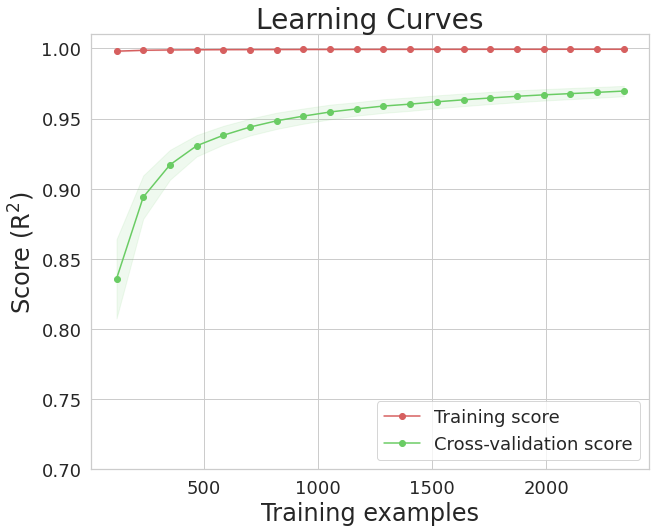

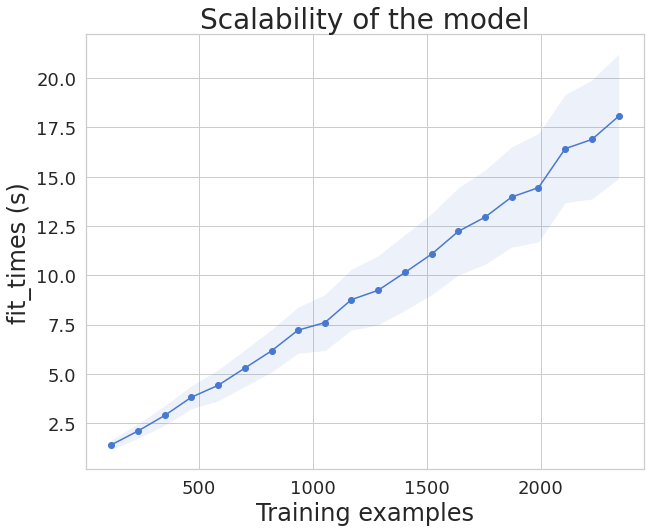

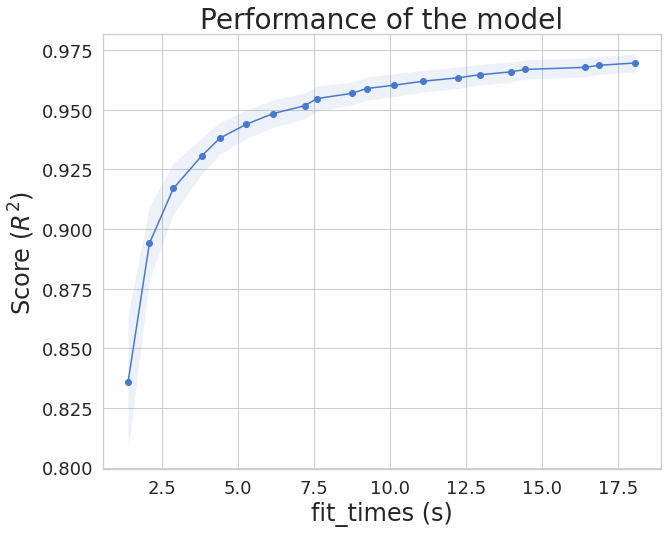

In [16]:
#benchmark
#Origin_TrainSet_f=r'%s/TrainingSet-2926-2.0-refined4.0-5-35-local-dBDEOrange.csv' % (Origin_dir)
Origin_dir=r'/PyScripts/PyTorch.dir/Popcorn/HAT_ReactivityPredictor'
Origin_TrainSet_f=r'%s/final/TrainingSet-2926-5-35-dBDEOrange.csv' % (Origin_dir)
#Origin_TrainSet_f=r'%s/final/SPMS-TrainingSet-2926-5-35-dBDEOrange.csv' % (Origin_dir)
a=HAT_Reac_Predictor(Origin_dir, Origin_TrainSet_f, model=ada, reloadTimestamp=None)

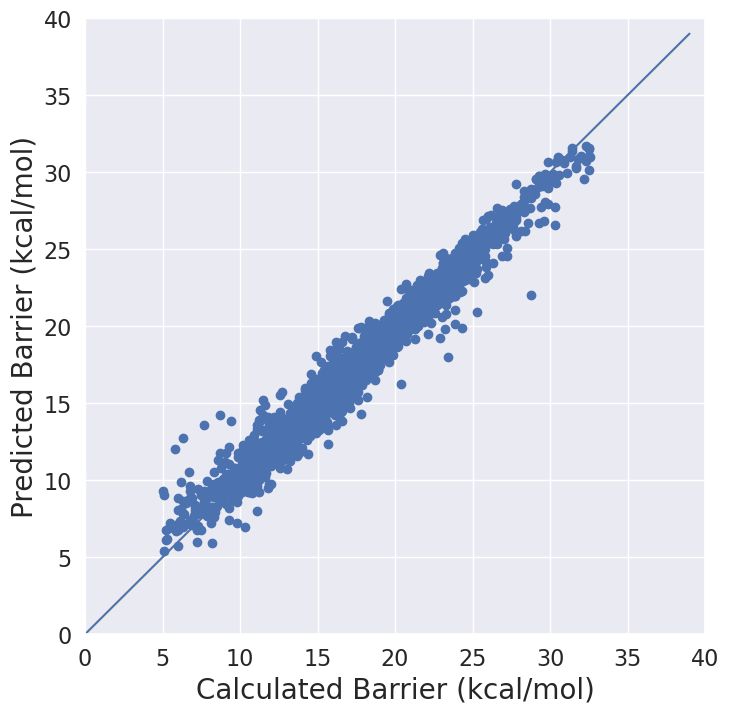

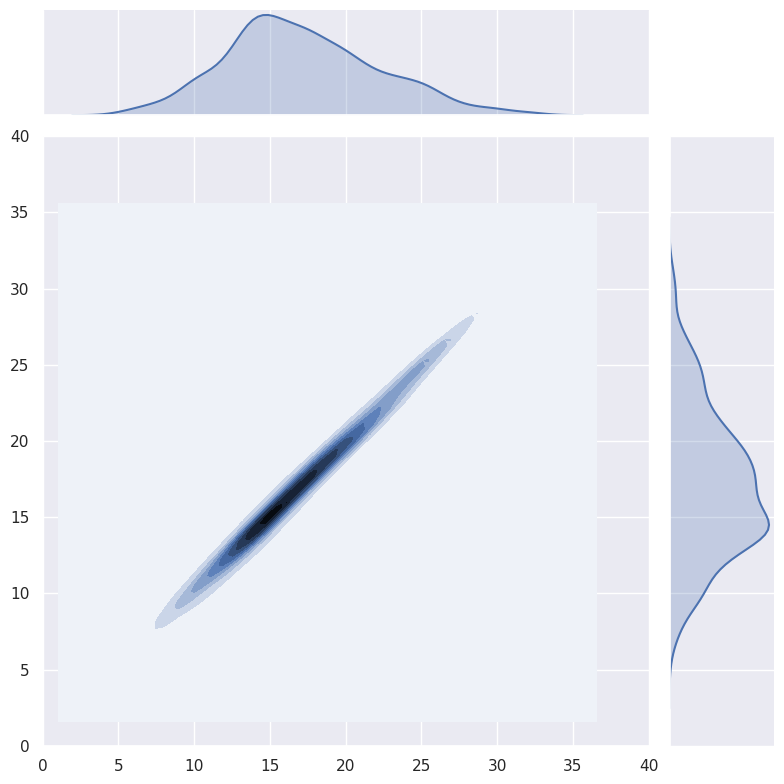

R2:  0.9680677534205978
MAE:  0.6318522632338422
MSE:  0.8040788778817837
RMSE:  0.8967044540325333
RFECV(cv=KFold(n_splits=5, random_state=200, shuffle=True),
      estimator=AdaBoostRegressor(base_estimator=ExtraTreesRegressor(bootstrap=False,
                                                                     ccp_alpha=0.0,
                                                                     criterion='mse',
                                                                     max_depth=None,
                                                                     max_features='auto',
                                                                     max_leaf_nodes=None,
                                                                     max_samples=None,
                                                                     min_impurity_decrease=0.0,
                                                                     min_impurity_split=None,
                                          

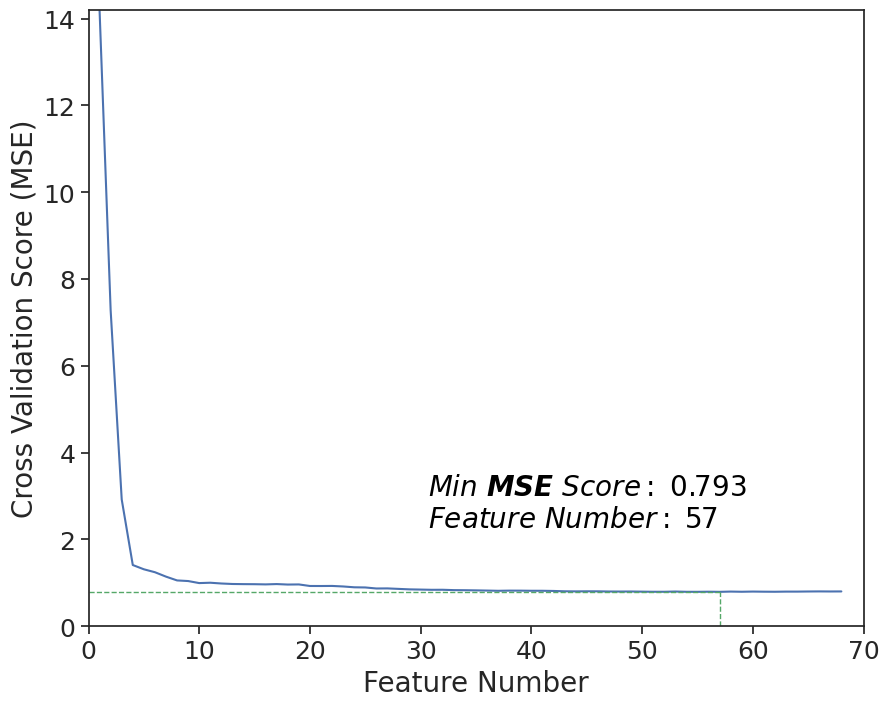

Feature number:  57
Min MSE_score:  0.7926357526558372
   Feature name    scores
0           BDE  0.232171
43         Esp4  0.093011
40         Esp1  0.077586
42         Esp3  0.047699
17         Qsr1  0.035953
41         Esp2  0.032514
23         Bsr3  0.021981
46         Bsp1  0.020783
5          Ecr5  0.019759
31         Ecp5  0.019120
8          Bcr1  0.016753
30         Ecp4  0.015919
21         Bsr1  0.015171
34         Bcp1  0.014255
10         Vcr2  0.013643


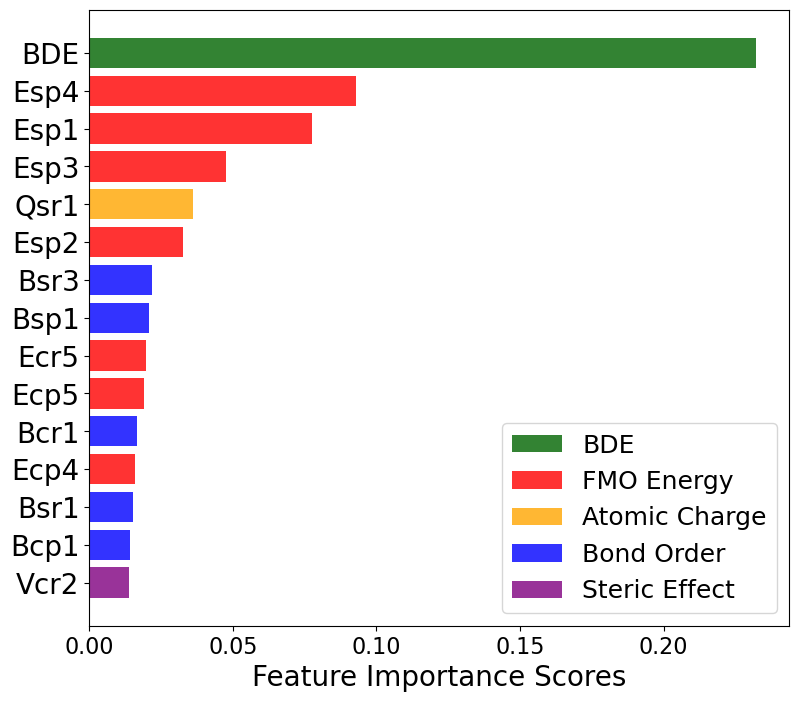

   Feature name    scores
0           BDE  0.232171
43         Esp4  0.093011
40         Esp1  0.077586
42         Esp3  0.047699
17         Qsr1  0.035953
41         Esp2  0.032514
23         Bsr3  0.021981
46         Bsp1  0.020783
5          Ecr5  0.019759
31         Ecp5  0.019120
8          Bcr1  0.016753
30         Ecp4  0.015919
21         Bsr1  0.015171
34         Bcp1  0.014255
10         Vcr2  0.013643
9          Vcr1  0.013613
37         Vcp1  0.012989
36         Bcp3  0.012954
6          Qcr1  0.012104
47         Bsp2  0.011579
38         Vcp2  0.011540
33         Qcp1  0.011469
4          Ecr4  0.011407
35         Bcp2  0.011098
44         Qsp1  0.010905
28         Ecp2  0.010370
3          Ecr3  0.009044
51         Vcr4  0.008750
2          Ecr2  0.008606
14         Esr3  0.008511
45         Qsp2  0.008482
29         Ecp3  0.008363
11         Vcr3  0.008293
12         Esr1  0.008015
54         Vcp4  0.007780
39         Vcp3  0.006632
16         Esr6  0.006496
26         V

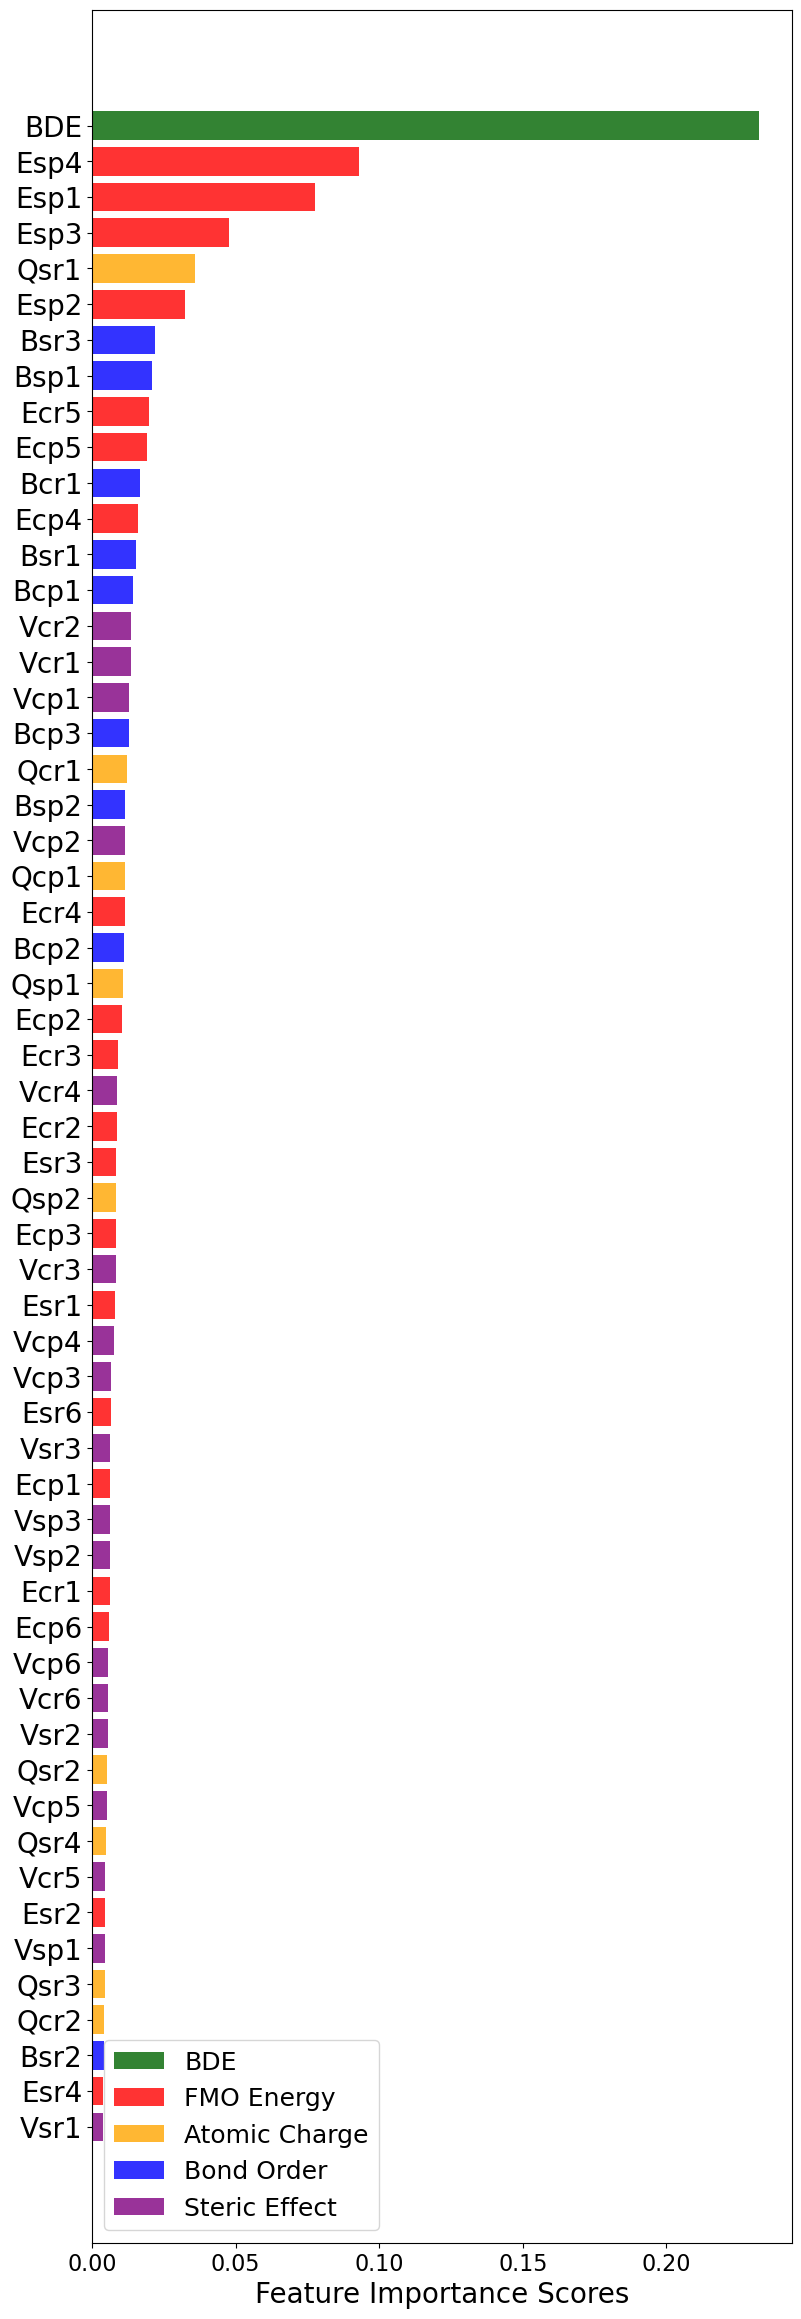

In [20]:
a.Plot_figure(y_DFT = a.y, y_pred=a.yCVPred, size=(8,8), xyaxis=[0,40,0,40])

# load best model

In [6]:
##调用模型
reloadTimestamp='20210113_120738'
Origin_dir=r'/PyScripts/PyTorch.dir/Popcorn/HAT_ReactivityPredictor'
Origin_TrainSet_f=r'%s/final/TrainingSet-2926-5-35-dBDEOrange.csv' % (Origin_dir)
b=HAT_Reac_Predictor(Origin_dir, Origin_TrainSet_f, model=ada, reloadTimestamp=reloadTimestamp)

Origin_Train_data.X.shape:  (2926, 56)
Origin_Train_data.domain:  [BDE, E12, E13, E14, E15, E16, Q07, Q08, B06, V07, V08, V09, E01, E02, E03, E04, E05, E06, Q01, Q02, Q03, Q04, B01, B02, B03, V01, V02, V03, E17, E18, E19, E20, E21, E22, Q09, Q10, Q11, Q12, B07, B08, B09, V10, V11, V12, E07, E08, E09, E10, E11, Q05, Q06, B04, B05, V04, V05, V06 | DG_TS] {Revise_fn, Substrate, Ar, sub, H, Radical, R_element}
model: AdaBoostRegressor(base_estimator=ExtraTreesRegressor(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
       

[11.65361111 13.47694444 11.92472222 13.87861111 13.64722222 16.6925
 16.75666667 17.06611111 11.12166667 13.49416667  7.35305556 13.05861111
 14.76916667 14.61027778 14.10833333 13.55083333 13.93444444 14.87611111
 14.56027778 11.97416667 10.48222222 12.15805556 10.74416667  8.93888889
 11.13666667 12.78805556 14.15638889 18.66388889 14.68694444 11.95777778
 11.70777778 16.02611111 18.87472222 18.34277778 14.305      14.65
 16.49388889 14.40916667 14.68694444 14.06277778  9.95666667  9.35305556
 10.18583333  9.93333333  9.61694444  9.71638889  8.8925     18.79777778
 18.41444444 16.32277778 12.39611111 20.46527778 20.26444444 19.83611111
 17.76722222 14.77333333 13.14833333 12.07166667 14.85694444 27.05333333
 26.35611111 16.38055556 16.16472222 18.735      19.67194444 10.75944444
 14.11      ]


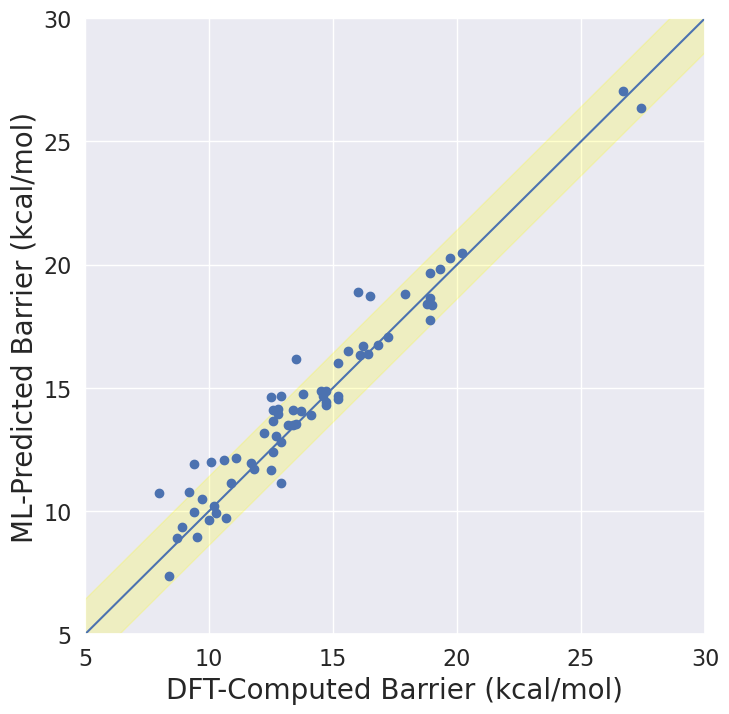

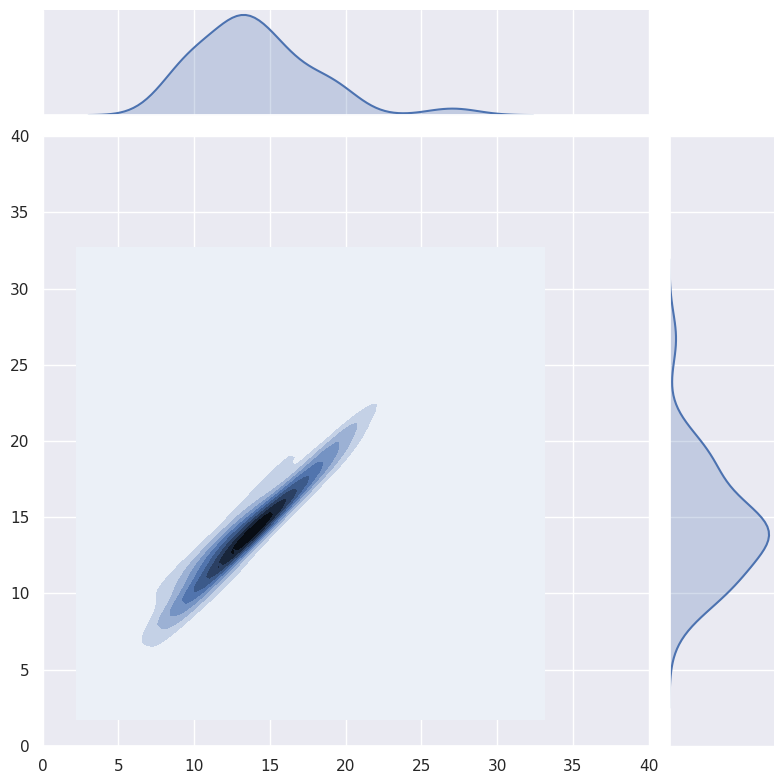

R2:  0.9226265000028466
MAE:  0.789925373134329
MSE:  1.1399448613414416
RMSE:  1.0676820038482626


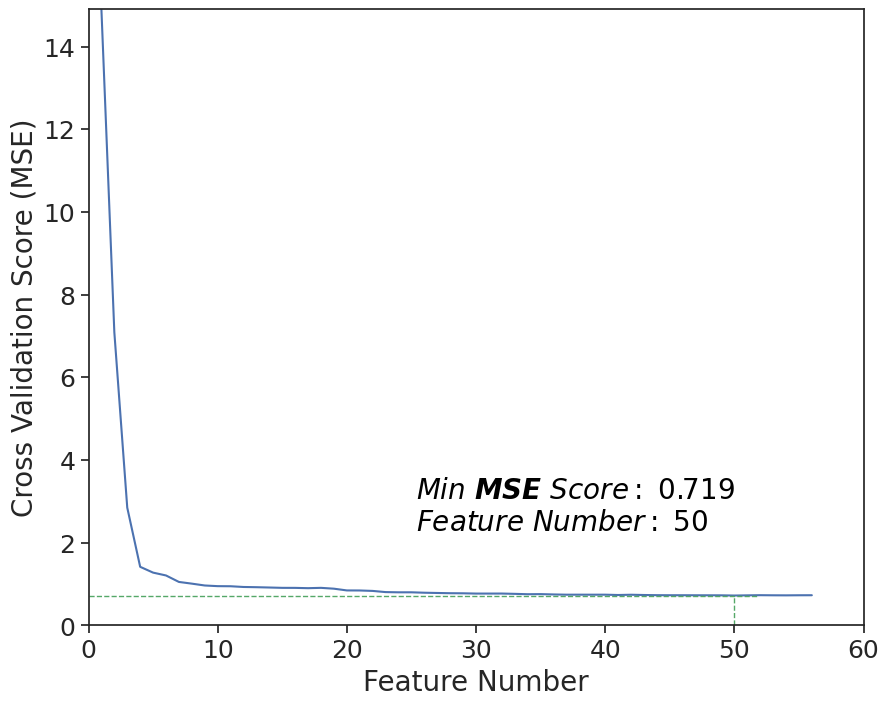

Feature number:  50
Min MSE_score:  0.7189447113781131
   Feature name    scores
0           BDE  0.244677
42          E10  0.090895
39          E07  0.074285
41          E09  0.048234
16          Q01  0.038005
40          E08  0.033120
29          E21  0.028256
21          B03  0.021948
8           B06  0.020816
28          E20  0.020695
45          B04  0.020510
5           E16  0.019637
20          B01  0.016331
9           V07  0.015069
35          B09  0.014239


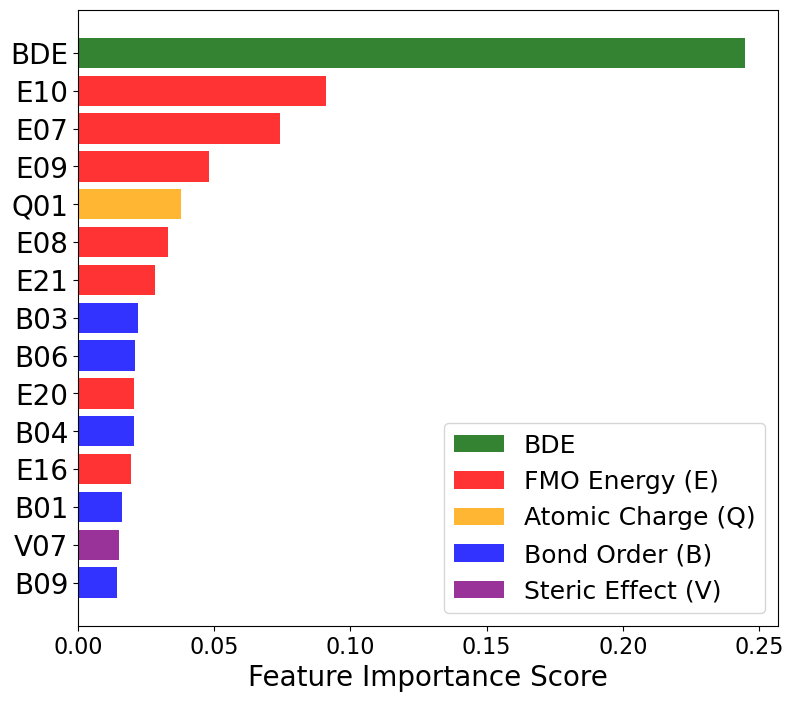

   Feature name    scores
0           BDE  0.244677
42          E10  0.090895
39          E07  0.074285
41          E09  0.048234
16          Q01  0.038005
40          E08  0.033120
29          E21  0.028256
21          B03  0.021948
8           B06  0.020816
28          E20  0.020695
45          B04  0.020510
5           E16  0.019637
20          B01  0.016331
9           V07  0.015069
35          B09  0.014239
10          V08  0.013544
31          Q09  0.013096
34          B08  0.012668
37          V11  0.012631
36          V10  0.012622
33          B07  0.012528
26          E18  0.011690
4           E15  0.011122
43          Q05  0.010789
6           Q07  0.010736
46          B05  0.010467
27          E19  0.010289
44          Q06  0.009458
30          E22  0.009294
3           E14  0.009036
14          E03  0.008944
2           E13  0.008889
12          E01  0.008551
11          V09  0.007660
15          E06  0.006701
38          V12  0.006615
24          V03  0.006535
49          

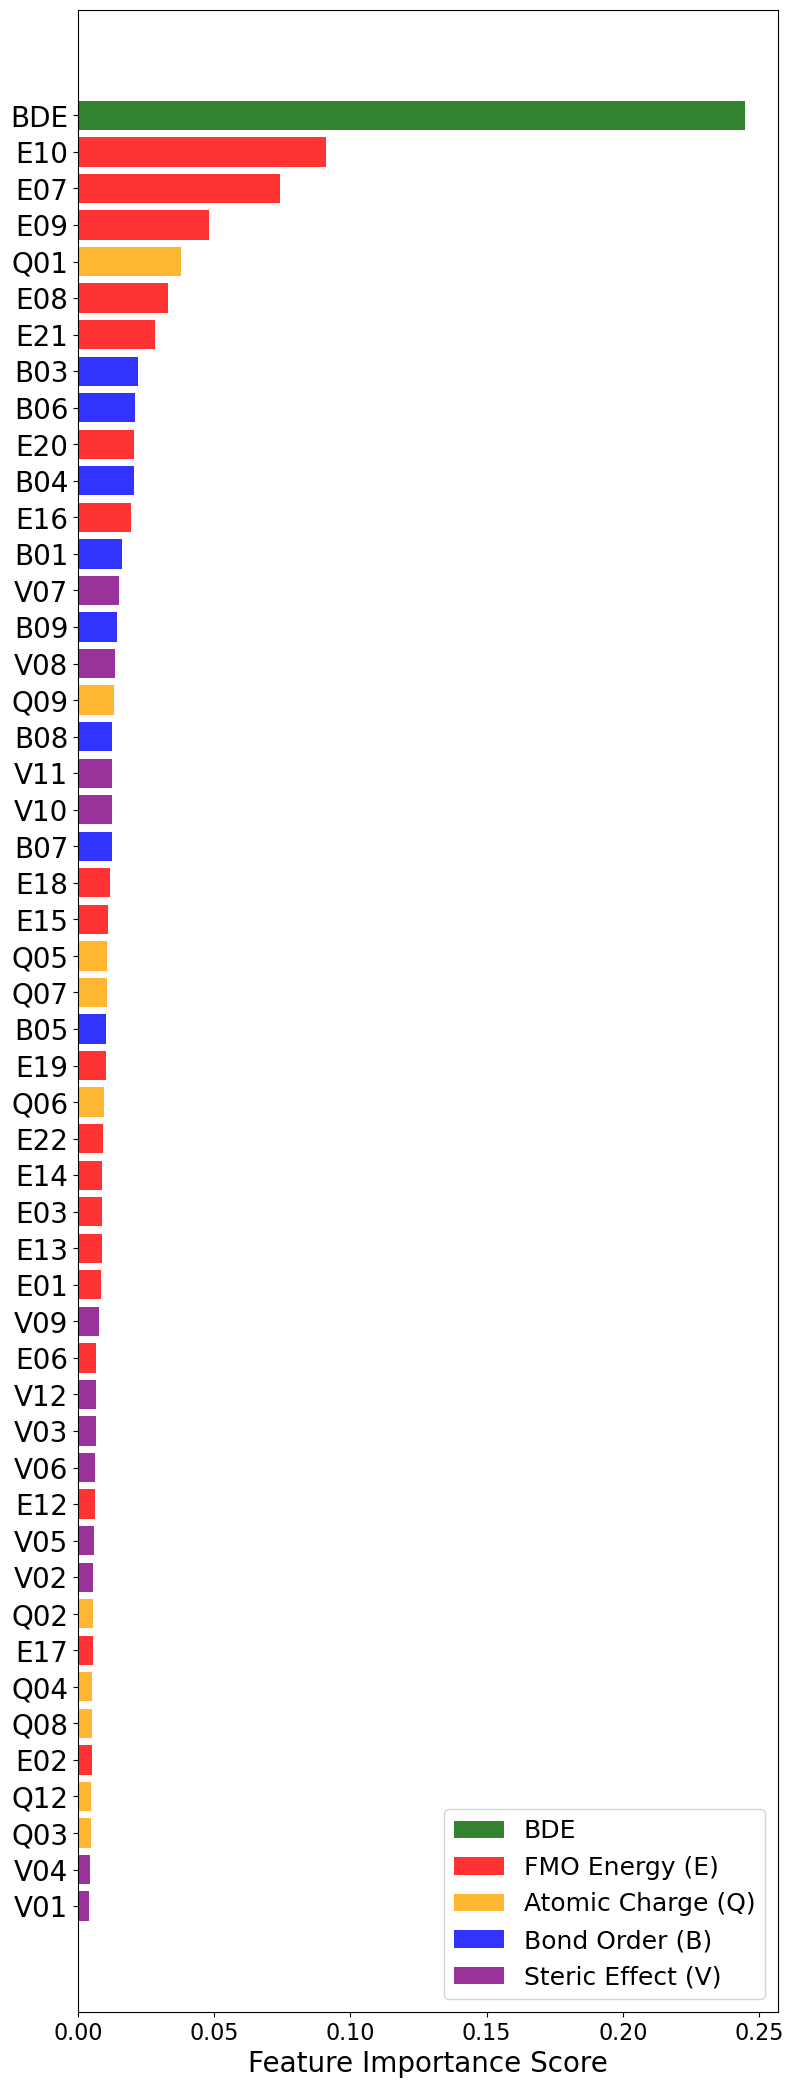

In [27]:
##测试集预测-67
#Origin_dir=r'/PyScripts/PyTorch.dir/Popcorn/Orange-TEST'
#ExtraSet_f=r'%s/final/ExpPredSet67-dBDEOrange.csv' % (Origin_dir)
ExtraSet_f=r'%s/final/Exp-CH2.0.csv' % (Origin_dir)
b.Load_test_data(Origin_ExtraSet_f=ExtraSet_f)
EyPred=b.selector.predict(b.Ex)
print(EyPred)
b.Plot_figure(y_DFT = b.Ey, y_pred=EyPred,size=(8,8), xyaxis=[5,30,5,30],band_width=1.4)

In [17]:
##不同底物构象的描述符
#Origin_dir=r'/PyScripts/PyTorch.dir/Popcorn/Orange-TEST'
#ExtraSet_f=r'%s/ExpPredSet107+ChalPredSet7-Orange.csv' % (Origin_dir)
#ExtraSet_f=r'%s/final/SubstrateConrm-selected2.0.csv' % (Origin_dir)
ExtraSet_f=r'%s/final/SubstrateConrm-schr-dBDE2.0.csv' % (Origin_dir)
b.Load_test_data(Origin_ExtraSet_f=ExtraSet_f)
EyPred=b.selector.predict(b.Ex)
EyPred
for i in EyPred:
    print(i)

16.6925
16.75666666666666
17.06611111111111
14.876111111111117
14.560277777777776
11.974166666666667
12.788055555555555
14.156388888888895
17.079444444444448
16.82388888888889
16.98638888888889
17.045
17.360833333333332
17.33472222222222
15.06777777777778
15.051944444444446
15.078333333333335
14.416388888888887
12.043055555555554
11.889166666666664
12.70027777777778
12.723333333333333
13.099166666666664
13.939166666666665
14.549722222222224
14.246111111111109


In [14]:
##不同构象的描述符cos列表生成
from scipy.spatial.distance import cosine
compare_num=b.Ex.shape[0]//2
cosine_list=[]
for i in range(len(b.Ex)//2):
    cosine_list.append(cosine(b.Ex[i],b.Ex[i+compare_num]))
cosine_list

[0.31606635885744516,
 0.34871286849698224,
 0.3454060863472189,
 0.25127224721326935,
 0.23222286472364262,
 0.41618190371239605,
 0.5110977661884422,
 0.5526677557844615]